# Binary Classification — Bank Marketing (UCI)


# Pinned installs for reproducibility in Colab






In [1]:
%pip -q install "pycaret>=3.0.4,<4" "pandas-datareader>=0.10.0" xgboost lightgbm catboost --upgrade


Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Data shape: (41188, 20)
y
no     36548
yes     4640
Name: count, dtype: int64


,Description,Value
0,Session id,42
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(41188, 20)"
5,Transformed data shape,"(41188, 62)"
6,Transformed train set shape,"(28831, 62)"
7,Transformed test set shape,"(12357, 62)"
8,Numeric features,9
9,Categorical features,10


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8996,0.7930,0.8996,0.8811,0.8813,0.3314,0.3666,1.0500
catboost,CatBoost Classifier,0.8984,0.7912,0.8984,0.8795,0.8808,0.3309,0.3626,7.3867
lr,Logistic Regression,0.8997,0.7847,0.8997,0.8812,0.8771,0.2960,0.3466,3.9700
xgboost,Extreme Gradient Boosting,0.8955,0.7731,0.8955,0.8761,0.8795,0.3298,0.3541,1.3967


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9018,0.8068,0.9018,0.8848,0.8816,0.3264,0.3719
1,0.9000,0.7912,0.9000,0.8816,0.8783,0.3046,0.3524
2,0.9002,0.7830,0.9002,0.8820,0.8792,0.3122,0.3578
Mean,0.9007,0.7937,0.9007,0.8828,0.8797,0.3144,0.3607
Std,0.0008,0.0099,0.0008,0.0014,0.0014,0.0090,0.0082


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Number of positive: 2165, number of negative: 17055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if me

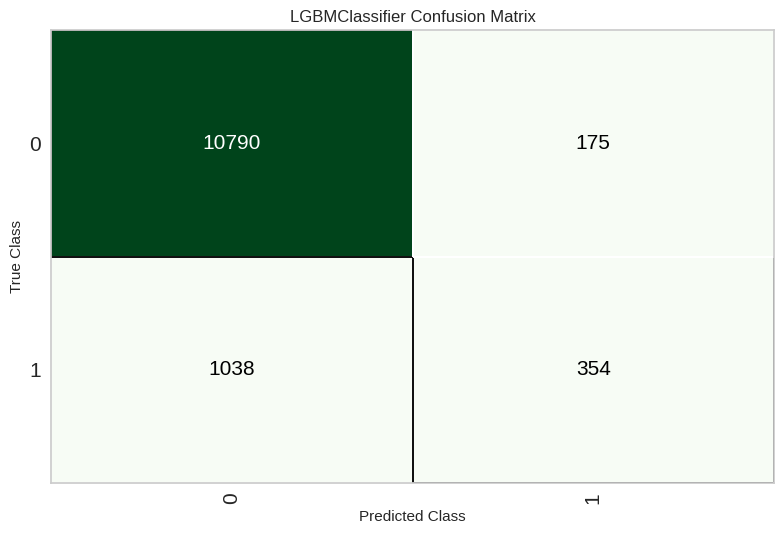

Transformation Pipeline and Model Successfully Saved
Saved: (Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'campaign', 'pdays',
                                             'previous', 'emp.var.rate',
                                             'cons.price.idx', 'cons.conf.idx',
                                             'euribor3m', 'nr.employed'],
                                    transformer=SimpleImputer(add...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learning_rate=0.05,
                              

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8000,1.0000,0.8000,0.6400,0.7111,0.0000,0.0000


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prediction_label,prediction_score
6576,53,technician,divorced,university.degree,no,yes,no,telephone,may,wed,...,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.000000,no,no,0.9688
36038,31,admin.,married,high.school,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.892998,-46.200001,1.266,5099.100098,yes,no,0.9102
18933,39,housemaid,married,basic.4y,no,no,yes,cellular,aug,mon,...,0,nonexistent,1.4,93.444000,-36.099998,4.970,5228.100098,no,no,0.9516
23756,49,housemaid,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,0,nonexistent,1.4,93.444000,-36.099998,4.962,5228.100098,no,no,0.9680
3699,31,blue-collar,single,basic.9y,no,yes,no,telephone,may,fri,...,0,nonexistent,1.1,93.994003,-36.400002,4.859,5191.000000,no,no,0.9546


In [2]:
# === PyCaret Binary Classification (CPU fallback; no GPU) ===
# Run this if the GPU run crashes. Safe + lighter settings.

import sys, subprocess, zipfile, io, requests, pandas as pd
print("Python:", sys.version)

# 1) Load UCI Bank Marketing data
zip_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
zf = zipfile.ZipFile(io.BytesIO(requests.get(zip_url).content))
with zf.open("bank-additional/bank-additional-full.csv") as f:
    df = pd.read_csv(f, sep=";")

# Basic cleanup
df = df.drop(columns=["duration"], errors="ignore").dropna().reset_index(drop=True)
print("Data shape:", df.shape)
print(df["y"].value_counts())

# 2) PyCaret workflow on CPU (no GPU)
from pycaret.classification import (
    setup, compare_models, tune_model, finalize_model,
    plot_model, save_model, predict_model
)

exp = setup(
    data=df,
    target="y",
    session_id=42,
    use_gpu=False,     # <<< CPU ONLY
    fold=3,            # lighter than 10 folds
    n_jobs=1           # conservative threads to avoid crashes
)

# Evaluate a stable subset of models
top = compare_models(
    include=["xgboost", "catboost", "lightgbm", "lr"],
    sort="AUC"
)

# Tune, plot, finalize, save
best = tune_model(top, optimize="AUC", choose_better=True)
plot_model(best, plot="confusion_matrix")

final = finalize_model(best)
path = save_model(final, "bank_marketing_classifier_cpu")
print("Saved:", path)

# Quick inference demo
sample = df.sample(5, random_state=7)
display(predict_model(final, data=sample))


In [3]:
import pycaret, pandas, numpy, sklearn
print("pycaret:", pycaret.__version__)
print("pandas :", pandas.__version__)
print("numpy  :", numpy.__version__)
print("sklearn:", sklearn.__version__)


pycaret: 3.3.2
pandas : 2.1.4
numpy  : 1.26.4
sklearn: 1.4.2
